# Project Ohm

In [118]:
import pandas as pd
import statsmodels.formula.api as sm
import statsmodels.stats.sandwich_covariance as sw
import numpy as np
from urllib.request import urlopen
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
sns.set(style="darkgrid")

In [83]:
d = pd.read_csv("../data/meditation.csv")
d.head()

,ID,Group,Name,Recruited_By,Location,Age_Group,Gender,Religion,Pre_existing_blood_pressure,Years_practice,...,After_Med_BP_DIA,After_Med_BP_PUL,Post_Med_focus,B4_color_BP_Sys,B4_color_BP_DIA,B4_color_BP_Pul,After_color_BP_Sys,After_color_BP_DIA,After_color_BP_Pul,Enjoy_Coloring
0,1,0,"Sundell, Jenna",Erika,"San Diego, CA",40-49,F,Buddhist,Low,25,...,59.0,59.0,4.0,108.0,64.0,54.0,94.0,64.0,59.0,2.0
1,2,1,"Hanni, Karin",Erika,"Bellingham, WA",40-49,F,Buddhist,Avg,10,...,61.0,75.0,3.0,122.0,64.0,79.0,101.0,57.0,75.0,3.5
2,3,0,"Roe, Brian",Erika,"Lopez Island, WA",50-59,M,Buddhist,Avg,45,...,73.0,85.0,4.0,123.0,64.0,79.0,109.0,69.0,83.0,4.0
3,4,1,"Aboud, Julie",Erika,"San Diego, CA",50-59,F,Spiritual,Low,47,...,71.0,95.0,3.0,121.0,91.0,100.0,113.0,75.0,93.0,5.0
4,5,0,"Harrison, Kelly",Erika,"Redwood City, CA",50-59,F,Buddhist,Avg,24,...,81.0,79.0,4.0,124.0,79.0,77.0,116.0,65.0,82.0,4.0


In [84]:
d.columns

Index(['ID', 'Group', 'Name', 'Recruited_By', 'Location', 'Age_Group',
       'Gender', 'Religion', 'Pre_existing_blood_pressure', 'Years_practice',
       'caffeinated_drinks', 'hours_since_last_caffeinated_drink',
       'Online_in_person', 'Experiment_Date', 'Start_Time',
       'previous_strenuous_activity', 'Before_Meditation_how_relaxed',
       'B4_Med_BP_Sys', 'B4_Med_BP_DIA', 'B4_Med_BP_PUL', 'After_Med_BP_Sys',
       'After_Med_BP_DIA', 'After_Med_BP_PUL', 'Post_Med_focus',
       'B4_color_BP_Sys', 'B4_color_BP_DIA', 'B4_color_BP_Pul',
       'After_color_BP_Sys', 'After_color_BP_DIA', 'After_color_BP_Pul',
       'Enjoy_Coloring'],
      dtype='object')

In [85]:
# Creating Pandas Series for Outcomes of Interest
d['HeartRate_C'] = d['After_color_BP_Pul']-d['B4_color_BP_Pul']
d['HeartRate_M'] = d['After_Med_BP_PUL']-d['B4_Med_BP_PUL']

d['Sys_C'] = d['After_color_BP_Sys']-d['B4_color_BP_Sys']
d['Sys_M'] = d['After_Med_BP_Sys']-d['B4_Med_BP_Sys']

d['DIA_C'] = d['After_color_BP_DIA']-d['B4_color_BP_DIA']
d['DIA_M'] = d['After_Med_BP_DIA']-d['B4_Med_BP_DIA']

In [87]:
d['order_grp'] = d["Group"].astype('category') 
d['recruiter'] = d["Recruited_By"].astype('category')
d['age'] = d['Age_Group'].astype('category')
d['gen'] = d["Gender"].astype('category')
d['rel'] = d["Religion"].astype('category')
d['bp_cat'] = d["Pre_existing_blood_pressure"].astype('category')
d['yrs'] = d["Years_practice"].astype('category')
d['caf'] = d["caffeinated_drinks"].astype('category')
d["hrs_caf"] = d["hours_since_last_caffeinated_drink"].astype('category')
d["in_pers"] = d["Online_in_person"].astype('category')
d['activity'] = d["previous_strenuous_activity"].astype('category')
d['prior_state'] = d["Before_Meditation_how_relaxed"].astype('category')
d["med_foc"] = d['Post_Med_focus'].astype('category')
d['col_enj'] = d["Enjoy_Coloring"].astype('category')

In [88]:
rob_ols = sm.ols(formula='HeartRate_M ~ order_grp + recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + med_foc', data=d).fit(cov_type='HC1', use_t=True)
rob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_M   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.071e+18
Date:                Sun, 06 Aug 2017   Prob (F-statistic):           7.67e-10
Time:                        23:42:31   Log-Likelihood:                 18.847
No. Observations:                  30   AIC:                             20.31
Df Residuals:                       1   BIC:                             60.94
Df Model:                          28                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                    -4.2539      1.355     -3.140      0.196       -21.466    12.958
order_grp[T.1]                6.1933      0.483     12.831      0.050         0.060    12.326
recruiter[T.Post]             5.4247      1.049      5.171      0.122        -7.904    18.753
recruiter[T.Thong]           -7.4109      0.151    -49.084      0.013        -9.329    -5.492
age[T.30-39]                 -1.5303      0.214     -7.136      0.089        -4.255     1.194
age[T.30-40]                 -3.7335      0.611     -6.115      0.103       -11.492     4.025
age[T.40-49]                  1.3139      0.429      3.062      0.201        -4.138     6.766
age[T.40-50]                  2.9802      0.030     99.331      0.006         2.599     3.361
age[T.5-9]                   -0.1702      0.202     -0.843      0.554        -2.735     2.395
age[T.50-59]                 -3.9307      2.117     -1.856      0.315       -30.836    22.974
age[T.50-60]                 -0.4140      0.212     -1.957      0.301        -3.102     2.274
age[T.60-70]                 -3.4637      1.161     -2.983      0.206       -18.219    11.292
age[T.80-90]                 -5.9131      1.174     -5.038      0.125       -20.827     9.001
gen[T.M]                     -3.8298      0.202    -18.974      0.034        -6.395    -1.265
rel[T.Buddhist]               4.6476      0.519      8.958      0.071        -1.945    11.240
rel[T.Cathollic]             -4.8825      0.220    -22.198      0.029        -7.677    -2.088
rel[T.Christian]              1.9609      0.112     17.458      0.036         0.534     3.388
rel[T.Christian/Buddhist]    -3.2353      1.326     -2.440      0.248       -20.082    13.611
rel[T.Hindu]                 -0.2402      2.325     -0.103      0.934       -29.788    29.308
rel[T.None]                   4.3163      0.819      5.271      0.119        -6.088    14.721
rel[T.Spiritual]              0.3920      0.474      0.827      0.560        -5.631     6.415
bp_cat[T.High]               -2.9328      0.621     -4.724      0.133       -10.821     4.956
bp_cat[T.Low]                -7.7081      0.722    -10.681      0.059       -16.877     1.461
caf[T.1]                      0.5000      1.936      0.258      0.839       -24.105    25.105
caf[T.1/2]                   -8.1001      1.196     -6.774      0.093       -23.292     7.092
caf[T.2]                      4.1597      1.533      2.714      0.225       -15.316    23.636
caf[T.3]                     -5.1630      1.239     -4.166      0.150       -20.911    10.585
yrs[T.1]                     -2.8724      0.431     -6.671      0.095        -8.343     2.599
yrs[T.2]                      6.3548      0.820      7.748      0.082        -4.067    16.777
yrs[T.10]                   -10.6793      1.509     -7.076      0.089      

In [29]:
rob_ols = sm.ols(formula='HeartRate_C ~ order_grp + recruiter + age + gen + rel + bp_cat + caf + yrs + in_pers + activity + prior_state + col_enj', data=d).fit(cov_type='HC1', use_t=True)
rob_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            HeartRate_C   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 1.135e+18
Date:                Sun, 06 Aug 2017   Prob (F-statistic):           7.45e-10
Time:                        22:59:49   Log-Likelihood:                -1.9474
No. Observations:                  30   AIC:                             61.89
Df Residuals:                       1   BIC:                             102.5
Df Model:                          28                                         
Covariance Type:                  HC1                                         
=============================================================================================
                                coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------------
Intercept                     1.5038      2.694      0.558      0.676       -32.728    35.735
order_grp[T.1]               -2.5933      1.907     -1.360      0.404       -26.820    21.633
recruiter[T.Post]             1.0913      0.121      9.054      0.070        -0.440     2.623
recruiter[T.Thong]            4.1902      0.326     12.867      0.049         0.052     8.328
age[T.30-39]                 -0.7608      0.390     -1.952      0.301        -5.713     4.191
age[T.30-40]                 -8.6679      2.484     -3.490      0.178       -40.225    22.889
age[T.40-49]                  3.3380      0.313     10.674      0.059        -0.636     7.312
age[T.40-50]                  8.4460      0.696     12.141      0.052        -0.393    17.286
age[T.5-9]                   -8.6187      0.864     -9.972      0.064       -19.600     2.363
age[T.50-59]                  5.3816      3.315      1.623      0.351       -36.743    47.506
age[T.50-60]                  8.1380      2.999      2.714      0.225       -29.967    46.242
age[T.60-70]                  1.5890      0.186      8.525      0.074        -0.779     3.957
age[T.80-90]                  0.4126      0.246      1.677      0.342        -2.713     3.538
gen[T.M]                      1.1807      0.794      1.487      0.377        -8.909    11.271
rel[T.Buddhist]               1.4013      1.536      0.912      0.529       -18.119    20.922
rel[T.Cathollic]              6.7299      0.682      9.863      0.064        -1.940    15.400
rel[T.Christian]              2.6803      0.307      8.733      0.073        -1.220     6.580
rel[T.Christian/Buddhist]    -0.8971      3.225     -0.278      0.827       -41.875    40.081
rel[T.Hindu]                  7.3769      2.091      3.529      0.176       -19.186    33.940
rel[T.None]                  -4.8646      3.279     -1.484      0.378       -46.530    36.800
rel[T.Spiritual]             -3.1843      1.224     -2.602      0.234       -18.733    12.364
bp_cat[T.High]                0.3820      0.181      2.113      0.281        -1.915     2.679
bp_cat[T.Low]                 1.8509      2.196      0.843      0.554       -26.053    29.755
caf[T.1]                     -6.5620      2.215     -2.963      0.207       -34.701    21.577
caf[T.1/2]                    5.0352      3.420      1.472      0.380       -38.417    48.488
caf[T.2]                     -0.7428      1.421     -0.523      0.693       -18.792    17.306
caf[T.3]                      4.9161      3.235      1.520      0.371       -36.188    46.020
yrs[T.1]                     -3.5044      0.863     -4.060      0.154       -14.473     7.464
yrs[T.2]                    -14.7205      0.717    -20.527      0.031       -23.832    -5.609
yrs[T.10]                    -2.2431      0.509     -4.406      0.142      

# Adjusting To "Cleaner" Categories

### First Clean Up Years Practiced

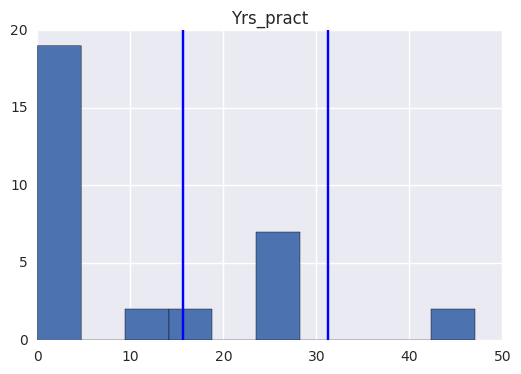

In [140]:
plt.hist(d["Years_practice"], bins=10)
plt.title("Yrs_pract")
plt.axvline(x=15.6)
plt.axvline(x=31.2)
plt.show()

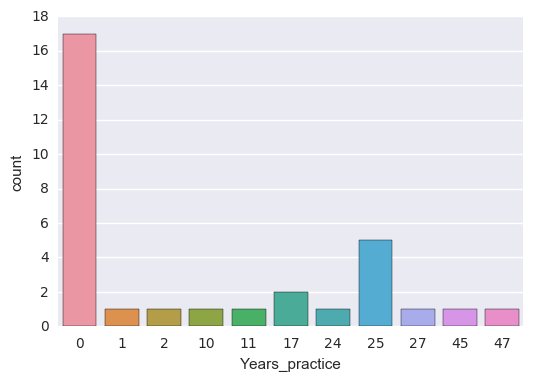

In [141]:
sns.countplot(x="Years_practice", data=d)

In [136]:
# Using function for mapping years
# Played around with different breakdowns, but think this is the most straightforward
# Corresponds to meditation experience or no meditation experience...
def yrMap(x):
    if x<0:
        return "Error"
    if x==0:
        return 0
    else:
        return 1

In [137]:
d['new_yr'] = d["Years_practice"].map(yrMap)

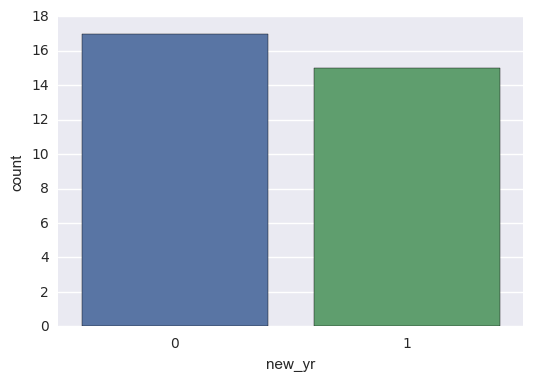

In [139]:
sns.countplot(x="new_yr", data=d)

### Now Clean Up Ages

In [97]:
# First just clean up what appears to be an error in the data
def ageMap(x):
    if x=='40-50':
        return '40-49'
    else:
        return x

In [98]:
d['new_age'] = d["Age_Group"].map(ageMap)

In [133]:
d['age2'] = d['new_age'].astype('category')

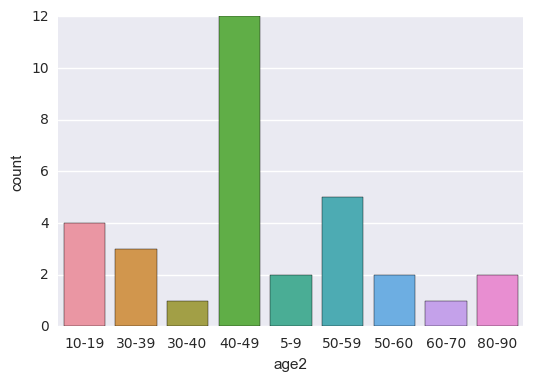

In [134]:
sns.countplot(x="age2", data=d)

### Now Clean Up Religion...a monumental effort

In [127]:
# First Catholic to Christian
def relMap(x):
    if x=='Cathollic' or x=='Catholic' or x=='Christian':
        return 'C'
    if x=='Buddhist':
        return 'B'
    if x== 'None':
        return 'None'
    else:
        return 'Other'

In [129]:
d['new_rel'] = d["Religion"].map(relMap)

In [130]:
d['rel2'] = d['new_rel'].astype('category')

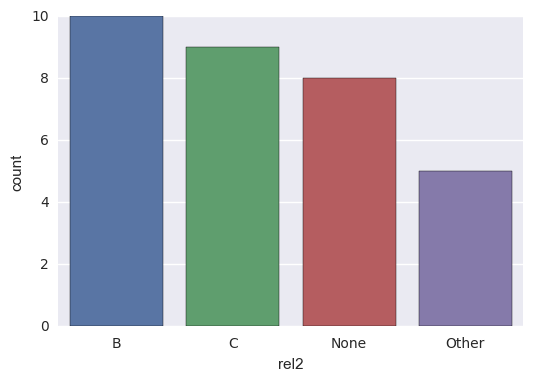

In [142]:
# Plot religious distribution to see break-out:
sns.countplot(x="rel2", data=d)

# alternative methods
#plt.hist(d["rel2"])
#plt.show()
#plt.plot(d.rel2.value_counts())

### Now Clean Up Caffeine

In [143]:
# Creating Intermediate Transformations of Series--into 'Arbitrary Categories'
# M


# Hours Since Caffeinated:  5-X:

